# Teaching Trust Take Home Assignment

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
dallas_staar_data = pd.read_excel('data/Teaching Trust Jr. Data Scientist data subset.xlsx', na_values='.')
dallas_staar_data

,CAMPUS,GRDTYPE,CA00AR01016D,CA00AR01S16N,CB00AR01016D,CB00AR01S16N,CW00AR01016D,CW00AR01S16N,CH00AR01016D,CH00AR01S16N,...,CI00AR03A17R,C200AR03A17R,C300AR03A17R,C400AR03A17R,CF00AR03A17R,CM00AR03A17R,CE00AR03A17R,CS00AR03A17R,CR00AR03A17R,CL00AR03A17R
0,57905001,S,1379.0,834.0,192.0,115.0,63.0,44.0,1057.0,641.0,...,-1.0,-1.0,-1.0,NaN,3.0,1.0,2.0,-1.0,1.0,-1.0
1,57905002,S,1134.0,595.0,29.0,15.0,-1.0,-1.0,1093.0,574.0,...,-1.0,NaN,-1.0,NaN,-1.0,1.0,1.0,-1.0,-1.0,-1.0
2,57905003,S,285.0,216.0,82.0,61.0,6.0,6.0,195.0,148.0,...,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,57905005,S,1545.0,982.0,47.0,23.0,5.0,5.0,1486.0,949.0,...,NaN,NaN,-1.0,NaN,2.0,2.0,2.0,7.0,1.0,1.0
4,57905006,S,741.0,418.0,120.0,72.0,40.0,31.0,571.0,309.0,...,-1.0,NaN,-1.0,NaN,3.0,-1.0,-1.0,-1.0,1.0,2.0
5,57905007,S,1446.0,689.0,58.0,28.0,8.0,5.0,1373.0,653.0,...,-1.0,-1.0,-1.0,NaN,3.0,1.0,2.0,-1.0,1.0,1.0
6,57905008,S,1208.0,591.0,353.0,152.0,8.0,5.0,837.0,431.0,...,-1.0,NaN,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
7,57905009,S,428.0,219.0,325.0,173.0,NaN,NaN,-3.0,-3.0,...,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,57905011,M,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,57905012,S,769.0,362.0,183.0,87.0,-1.0,-1.0,578.0,270.0,...,-1.0,-1.0,-1.0,NaN,1.0,2.0,2.0,-1.0,-1.0,-1.0


# Approaching Grade Level

## Overall

For the approaching grade level portion, I looked the list of columns described in the [document](https://rptsvr1.tea.texas.gov/perfreport/tapr/2017/download/campstaar2a.html) relating to approaching grade level. The first part asks for the overall percentage of students whose STAAR reading scores are approaching grade level, for this I used the columns CA00AR01017D and CA00AR01S17N.

In [10]:
dallas_staar_data['CA00AR01S17N'].sum(skipna=True) / dallas_staar_data['CA00AR01017D'].sum(skipna=True) * 100

62.963442810563365

## By Grade Level

The next portion breaks down the percentage of students approaching grade level into three categories: Elementary (E), Middle (M), and High School (S). To do this, three new dataframes were created, one for each grade level.

In [14]:
dallas_staar_data_e = dallas_staar_data[dallas_staar_data['GRDTYPE'] == 'E']
dallas_staar_data_m = dallas_staar_data[dallas_staar_data['GRDTYPE'] == 'M']
dallas_staar_data_s = dallas_staar_data[dallas_staar_data['GRDTYPE'] == 'S']

With the three new dataframes populated, we can use the same columns that were used for the overall percentage.

In [49]:
approach_grade_level_e = (dallas_staar_data_e['CA00AR01S17N'].sum(skipna=True) / dallas_staar_data_e['CA00AR01017D'].sum(skipna=True)) * 100
print(approach_grade_level_e)

68.06284207242719


In [50]:
approach_grade_level_m = (dallas_staar_data_m['CA00AR01S17N'].sum(skipna=True) / dallas_staar_data_m['CA00AR01017D'].sum(skipna=True)) * 100
print(approach_grade_level_m)

64.53500522466041


In [51]:
approach_grade_level_s = (dallas_staar_data_s['CA00AR01S17N'].sum(skipna=True) / dallas_staar_data_s['CA00AR01017D'].sum(skipna=True)) * 100
print(approach_grade_level_s)

55.1118712695033


## By Gender

For the gender percentage, we can use the original dataframe, instead of creating new dataframes.

### Female 

In [21]:
(dallas_staar_data['CF00AR01S17N'].sum(skipna=True) / dallas_staar_data['CF00AR01017D'].sum(skipna=True)) * 100

67.83724274287769

### Male

In [22]:
(dallas_staar_data['CM00AR01S17N'].sum(skipna=True) / dallas_staar_data['CM00AR01017D'].sum(skipna=True)) * 100

58.45527103425341

## By Race

Similarly to gender, we can use the original dataframe, but different columns will be used for each calculation.

### African-American

In [23]:
(dallas_staar_data['CB00AR01S17N'].sum(skipna=True) / dallas_staar_data['CB00AR01017D'].sum(skipna=True)) * 100

52.61897323752994

### American Indian

In [25]:
(dallas_staar_data['CI00AR01S17N'].sum(skipna=True) / dallas_staar_data['CI00AR01017D'].sum(skipna=True)) * 100

113.09523809523809

### Asian

In [26]:
(dallas_staar_data['C300AR01S17N'].sum(skipna=True) / dallas_staar_data['C300AR01017D'].sum(skipna=True)) * 100

61.696658097686374

### Hispanic

In [27]:
(dallas_staar_data['CH00AR01S17N'].sum(skipna=True) / dallas_staar_data['CH00AR01017D'].sum(skipna=True)) * 100

64.36032917311955

### Pacific Islander

In [28]:
(dallas_staar_data['C400AR01S17N'].sum(skipna=True) / dallas_staar_data['C400AR01017D'].sum(skipna=True)) * 100

100.0

### Two or More Races

In [29]:
(dallas_staar_data['C200AR01S17N'].sum(skipna=True) / dallas_staar_data['C200AR01017D'].sum(skipna=True)) * 100

340.0

### White

In [30]:
(dallas_staar_data['CW00AR01S17N'].sum(skipna=True) / dallas_staar_data['CW00AR01017D'].sum(skipna=True)) * 100

86.11530335043767

# Meets Grade Level

## Overall

In [31]:
(dallas_staar_data['CA00AR04216N'].sum(skipna=True) / dallas_staar_data['CA00AR04217D'].sum(skipna=True)) * 100

34.0154502593703

## By Grade Level

### Elementary School

In [45]:
meets_grade_level_e = (dallas_staar_data_e['CA00AR04216N'].sum(skipna=True) / dallas_staar_data_e['CA00AR04217D'].sum(skipna=True)) * 100
print(meets_grade_level_e)

35.378060524703066


### Middle School

In [47]:
meets_grade_level_m = (dallas_staar_data_m['CA00AR04216N'].sum(skipna=True) / dallas_staar_data_m['CA00AR04217D'].sum(skipna=True)) * 100
print(meets_grade_level_m)

28.335842833584284


### High School

In [48]:
meets_grade_level_s = (dallas_staar_data_s['CA00AR04216N'].sum(skipna=True) / dallas_staar_data_s['CA00AR04217D'].sum(skipna=True)) * 100
print(meets_grade_level_s)

40.15143202019094


## By Gender

### Female

In [39]:
(dallas_staar_data['CF00AR04217N'].sum(skipna=True) / dallas_staar_data['CF00AR04217D'].sum(skipna=True)) * 100

42.195239667742015

### Male

In [40]:
(dallas_staar_data['CM00AR04217N'].sum(skipna=True) / dallas_staar_data['CM00AR04217D'].sum(skipna=True)) * 100

34.35000975229179

## By Race

### African-American

In [35]:
(dallas_staar_data['CB00AR04217N'].sum(skipna=True) / dallas_staar_data['CB00AR04217D'].sum(skipna=True)) * 100

28.57925493060628

### American Indian

In [36]:
(dallas_staar_data['CI00AR04217N'].sum(skipna=True) / dallas_staar_data['CI00AR04217D'].sum(skipna=True)) * 100

100.0

### Asian

In [37]:
(dallas_staar_data['C300AR04217N'].sum(skipna=True) / dallas_staar_data['C300AR04217D'].sum(skipna=True)) * 100

58.4

### Hispanic

In [38]:
(dallas_staar_data['CH00AR04217N'].sum(skipna=True) / dallas_staar_data['CH00AR04217D'].sum(skipna=True)) * 100

38.28715810304615

### Pacific Islander

In [41]:
(dallas_staar_data['C400AR04217N'].sum(skipna=True) / dallas_staar_data['C400AR04217D'].sum(skipna=True)) * 100

100.0

### Two or More Races

In [42]:
(dallas_staar_data['C200AR04217N'].sum(skipna=True) / dallas_staar_data['C200AR04217D'].sum(skipna=True)) * 100

321.42857142857144

### White

In [43]:
(dallas_staar_data['CW00AR04217N'].sum(skipna=True) / dallas_staar_data['CW00AR04217D'].sum(skipna=True)) * 100

74.95029821073558

# Graphs

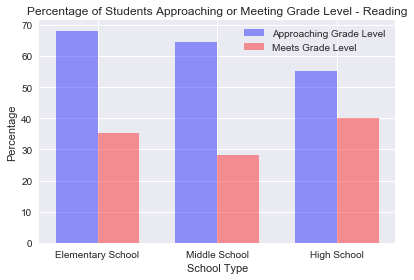

In [62]:
approach = [approach_grade_level_e, approach_grade_level_m, approach_grade_level_s]
meeting = [meets_grade_level_e, meets_grade_level_m, meets_grade_level_s]
index_approach = np.arange(len(approach))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.4
#error_config = {'ecolor': '0.3'}

group1 = ax.bar(index_approach, approach, bar_width,
               alpha=opacity, color='b', label='Approaching Grade Level')

group2 = ax.bar(index_approach+bar_width, meeting, bar_width,
               alpha=opacity, color='r', label='Meets Grade Level')

ax.set_xlabel('School Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Students Approaching or Meeting Grade Level - Reading')
ax.set_xticks(index_approach + bar_width / 2)
ax.set_xticklabels(('Elementary School', 'Middle School', 'High School'))
ax.legend()

fig.tight_layout()
#plt.bar(index_approach, approach)
plt.show()